# Generatives Trainig mit DeepHull und Max-Distanz loss, generatives und normales Netz trainieren unabhängig voneinander
falls noch kein ICNN Netz exisitiert, kann eins gelernt werden, indem man init auf True setzt

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for


In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 30
batch_size = 10

number_of_adversarial_samples = 1000
number_of_train_samples = 1000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False

In [3]:
true_extremal_points = Rhombus().get_extremal_points()
if init:
    included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data= ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    random_samples = []
    for i in range(number_of_adversarial_samples): # generate random samples
        x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
        y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
        random_samples.append([[x, y]])

    value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

if init:
    torch.save(ambient_space, "../../ambient_space.pt")
    torch.save(included_space, "../../included_space.pt")
    torch.save(value, "../../value.pt")
else:
    icnn.load_state_dict(torch.load("../../icnn.pt"), strict=False)
    ambient_space = torch.load("../../ambient_space.pt").to(torch.float64)
    included_space = torch.load("../../included_space.pt").to(torch.float64)
    value = torch.load("../../value.pt").to(torch.float64)
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data=ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

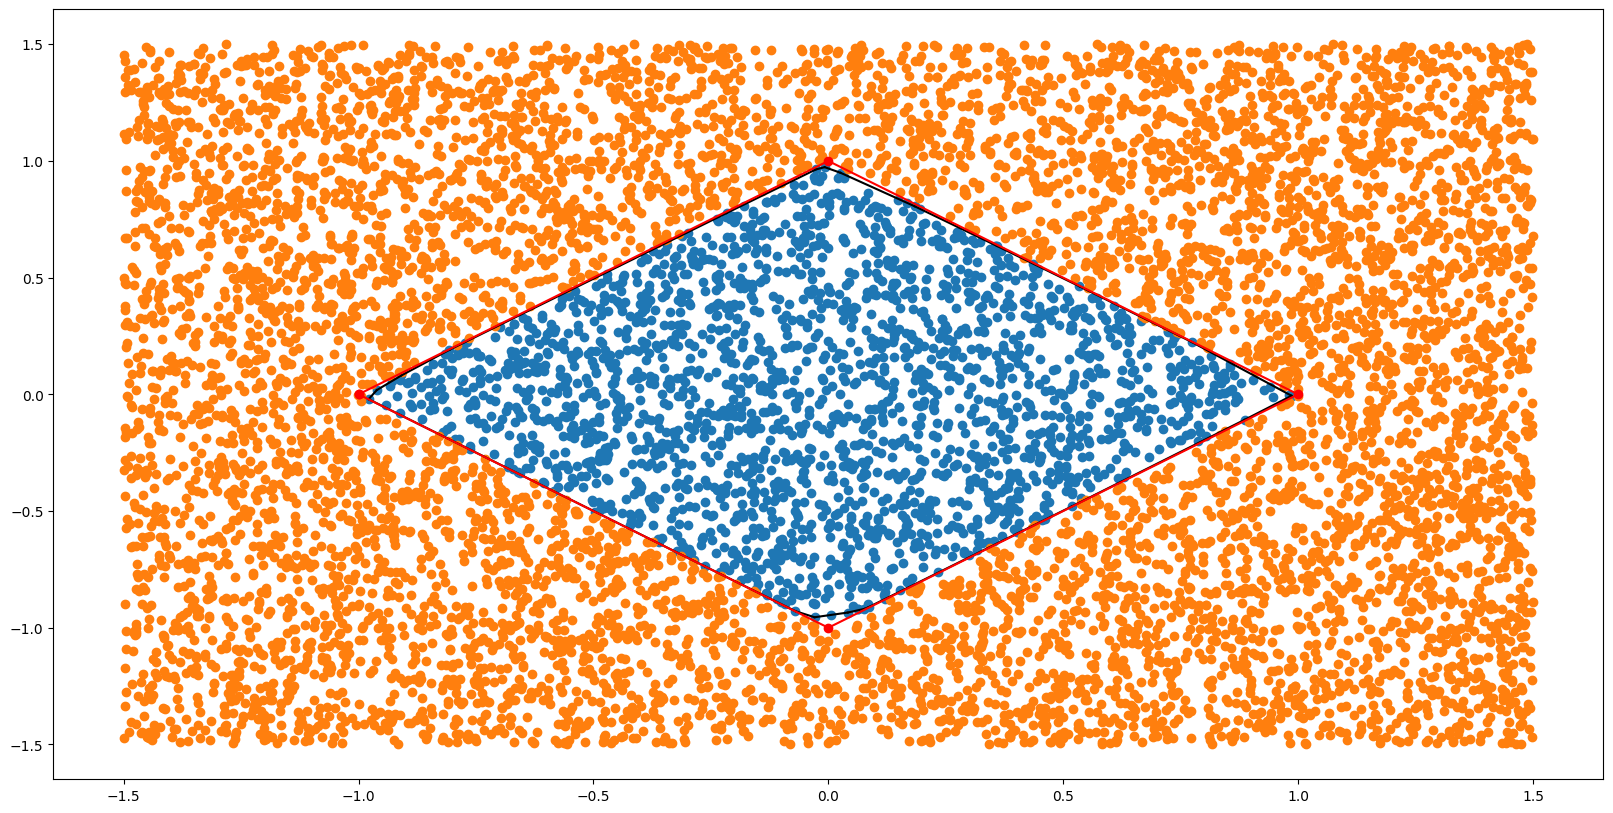

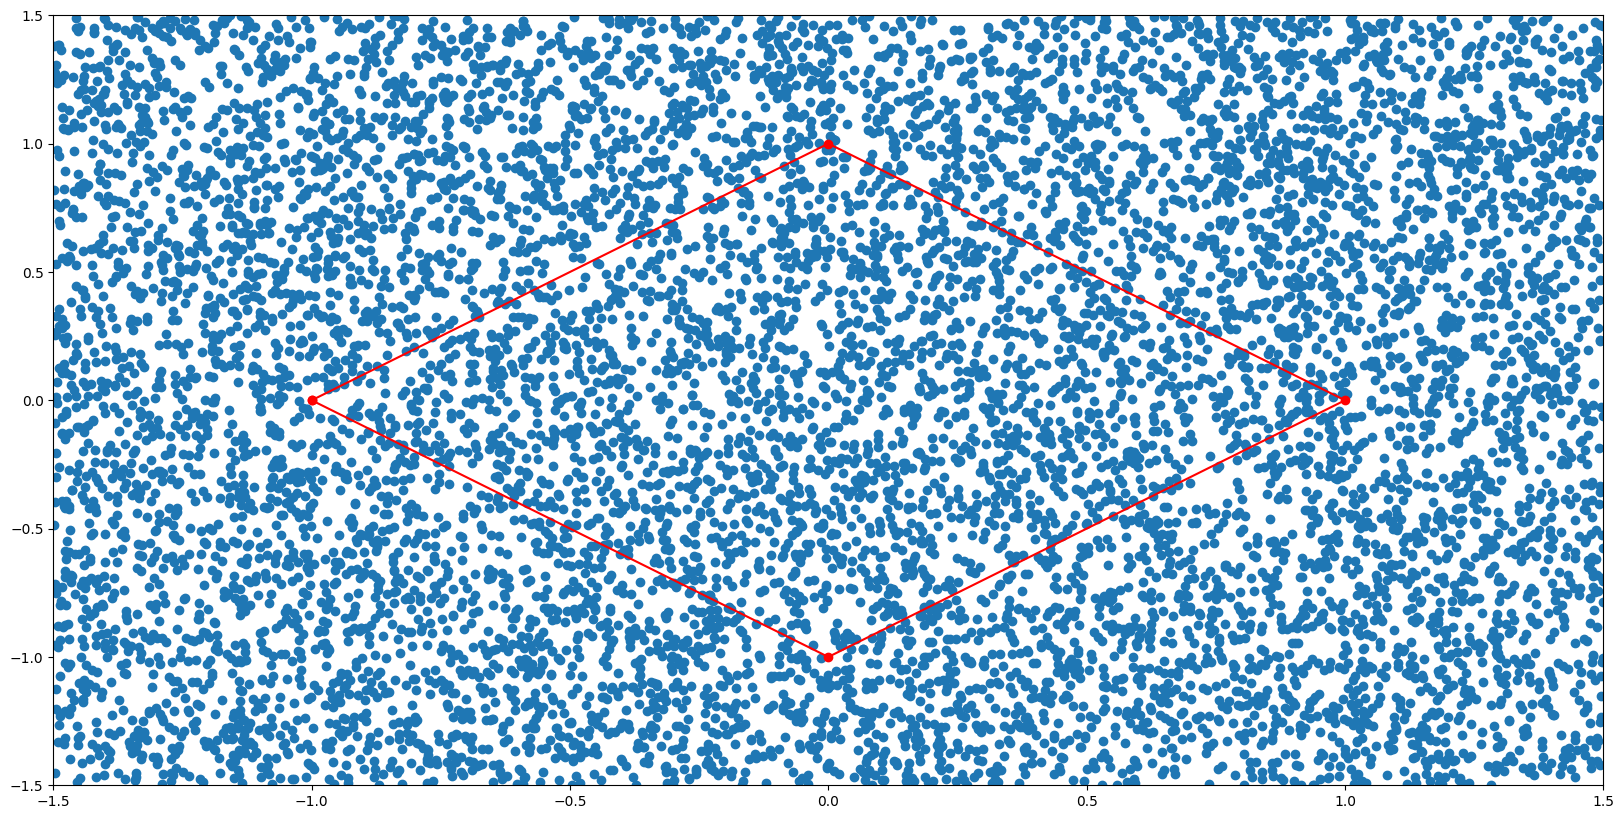

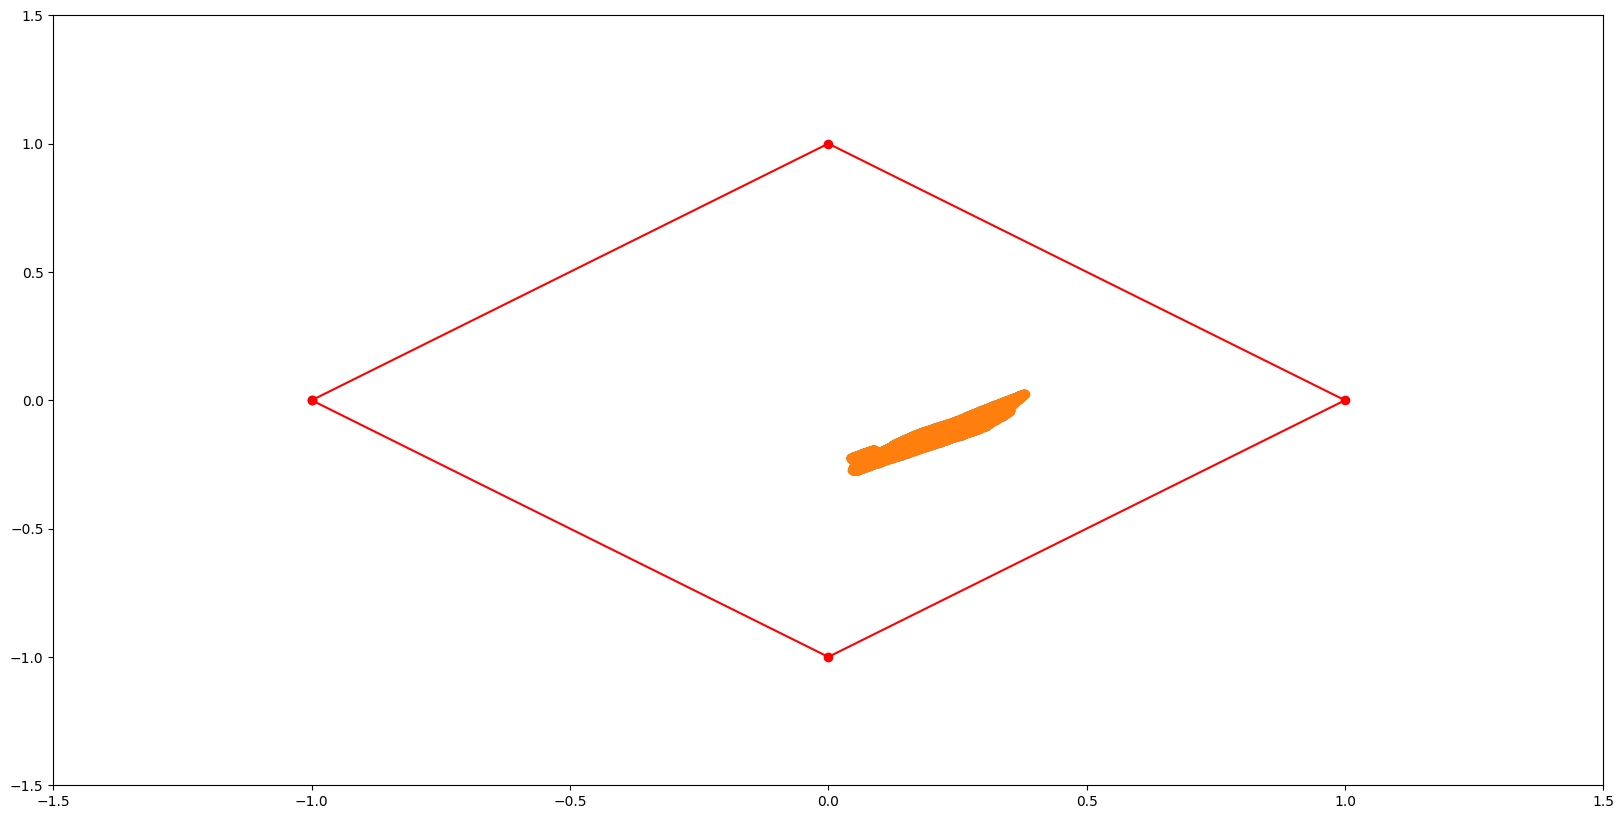

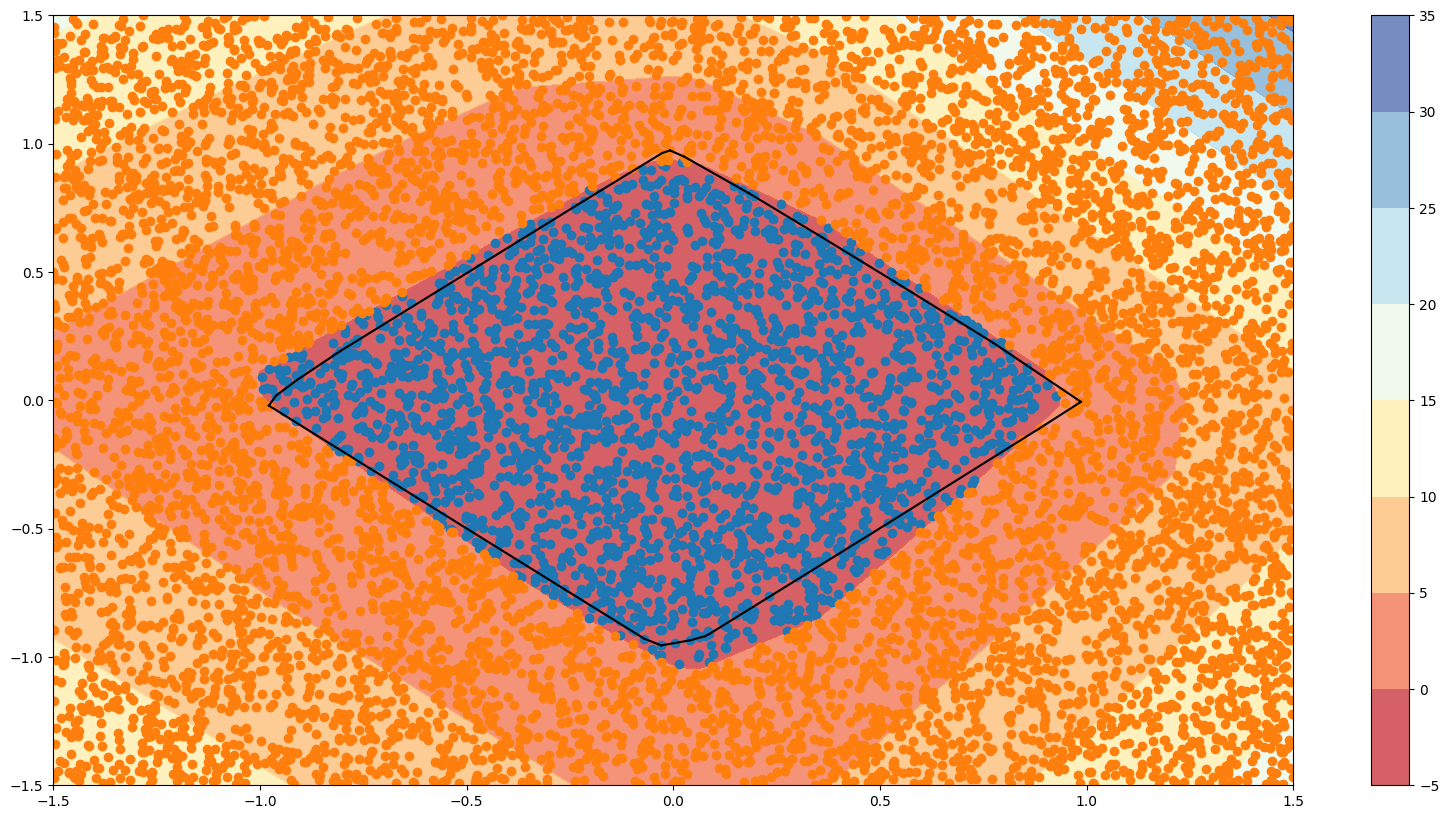

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
    torch.save(icnn.state_dict(), "../../icnn.pt")
plots.plt_mesh()

=== Epoch: 0===
batch = 0, mean loss = 14.085787456181192, l_pos = 0.14702899046416218, l_neg = 0.0, l_gen = 13.93875846571703
batch = 100, mean loss = 12.846009398521979, l_pos = 0.19528035273462982, l_neg = 0.0, l_gen = 12.650729045787347
batch = 200, mean loss = 11.681486025779947, l_pos = 0.19700446358779491, l_neg = 0.0, l_gen = 11.484481562192144
batch = 221, mean loss = 11.501728931999718, l_pos = 0.1959114236821398, l_neg = 0.0, l_gen = 11.305817508317572
=== Epoch: 1===
batch = 0, mean loss = 9.174672343634713, l_pos = 0.1572837830055251, l_neg = 0.0, l_gen = 9.017388560629188
batch = 100, mean loss = 9.552403377496269, l_pos = 0.19513146320159966, l_neg = 0.0, l_gen = 9.35727191429467
batch = 200, mean loss = 9.381907780419665, l_pos = 0.19581110427921736, l_neg = 0.0, l_gen = 9.186096676140439
batch = 221, mean loss = 9.350060060145205, l_pos = 0.19591142368213987, l_neg = 0.0, l_gen = 9.15414863646306
=== Epoch: 2===
batch = 0, mean loss = 9.27708375083298, l_pos = 0.250624

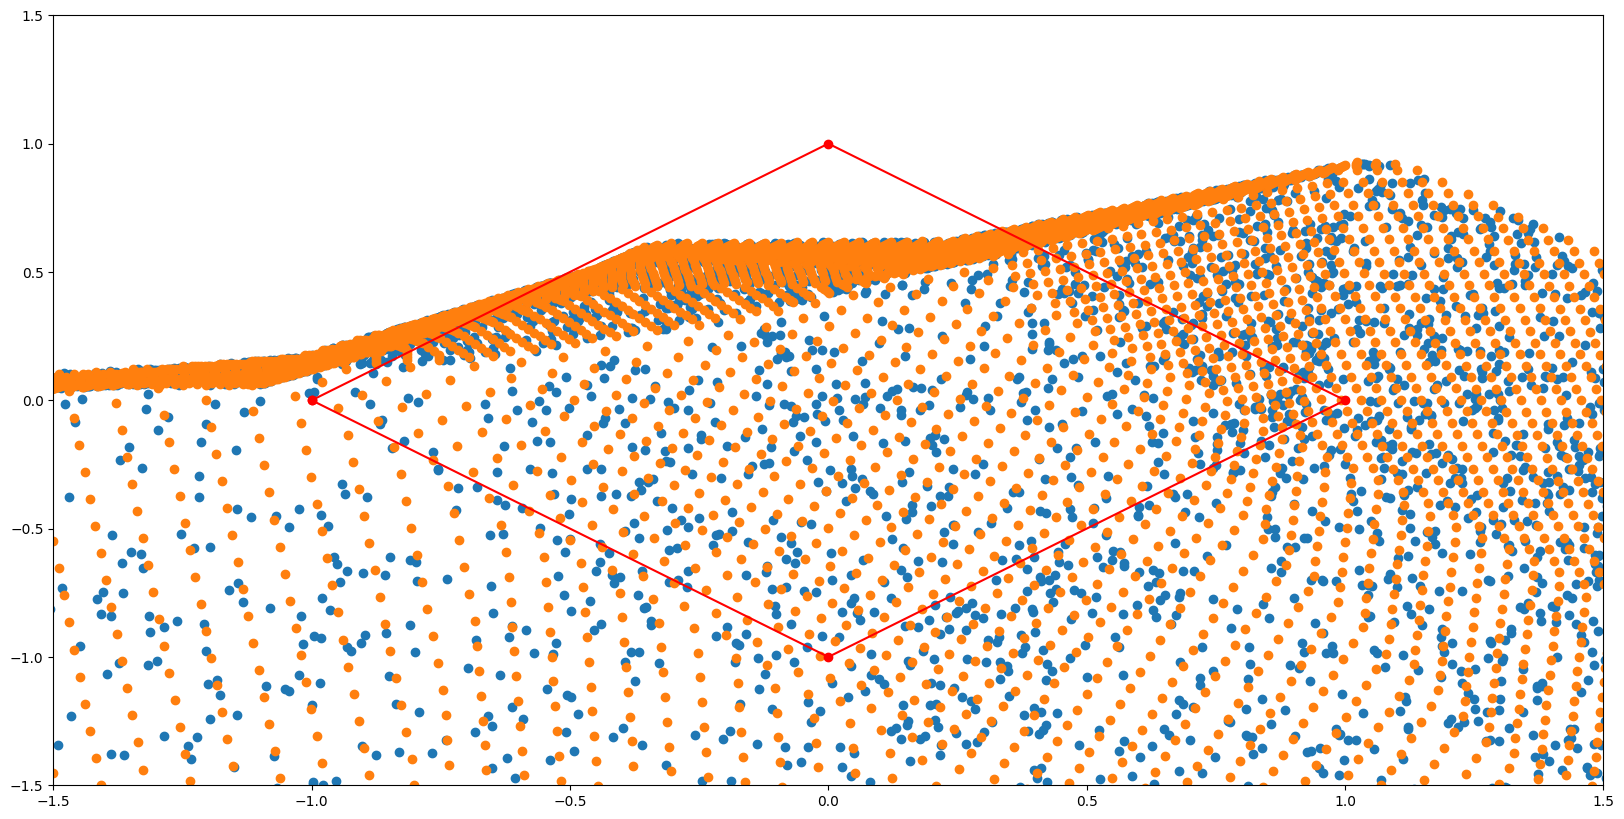

=== Epoch: 0===
batch = 0, mean loss = 6.354872906510469, l_pos = 0.24527396400493537, l_neg = 0.0, l_gen = 6.109598942505533
batch = 100, mean loss = 7.0381039446123115, l_pos = 0.19725232603558984, l_neg = 0.0, l_gen = 6.840851618576722
batch = 200, mean loss = 7.086773678099547, l_pos = 0.19679693328517991, l_neg = 0.0, l_gen = 6.88997674481436
batch = 221, mean loss = 7.020202621924616, l_pos = 0.19591142368213982, l_neg = 0.0, l_gen = 6.82429119824247
=== Epoch: 1===
batch = 0, mean loss = 6.9066282570207065, l_pos = 0.18589948224474573, l_neg = 0.0, l_gen = 6.720728774775961
batch = 100, mean loss = 6.845173122015605, l_pos = 0.19384148799704387, l_neg = 0.0, l_gen = 6.6513316340185575
batch = 200, mean loss = 6.842524812642465, l_pos = 0.19638775671793626, l_neg = 0.0, l_gen = 6.646137055924535
batch = 221, mean loss = 6.799534069728136, l_pos = 0.19591142368214, l_neg = 0.0, l_gen = 6.603622646046005
=== Epoch: 2===
batch = 0, mean loss = 7.086117125108325, l_pos = 0.2245995315

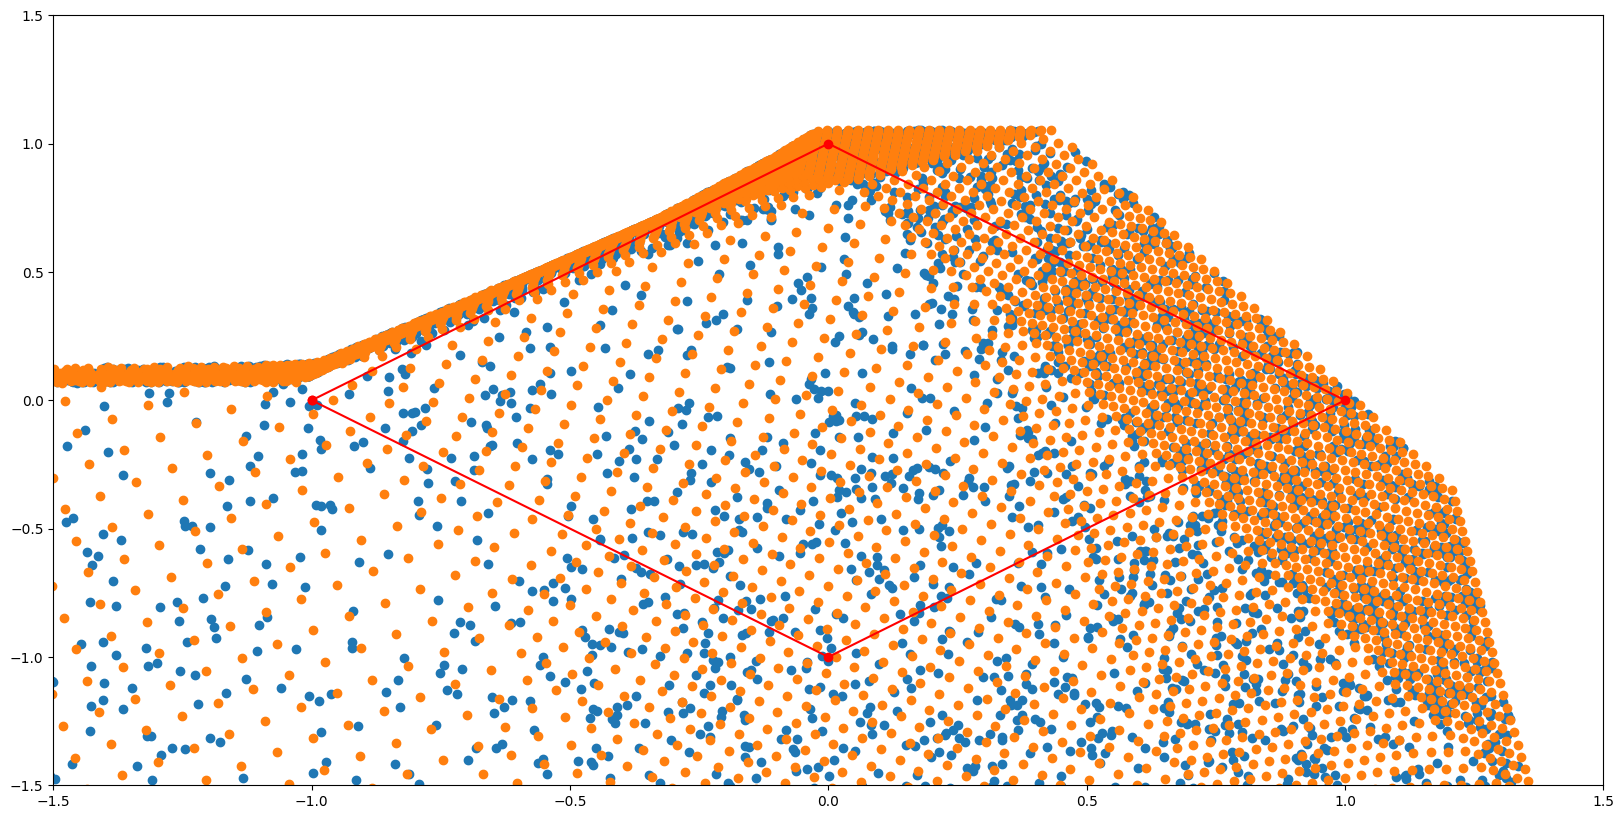

=== Epoch: 0===
batch = 0, mean loss = 7.115594253420729, l_pos = 0.2229264762508508, l_neg = 0.0, l_gen = 6.892667777169878
batch = 100, mean loss = 6.722470299533641, l_pos = 0.19220557903775903, l_neg = 0.0, l_gen = 6.53026472049588
batch = 200, mean loss = 6.756078998400623, l_pos = 0.19630109838673684, l_neg = 0.0, l_gen = 6.559777900013883
batch = 221, mean loss = 6.795339426810206, l_pos = 0.19591142368213996, l_neg = 0.0, l_gen = 6.599428003128064
=== Epoch: 1===
batch = 0, mean loss = 6.344019625626754, l_pos = 0.21558094388491605, l_neg = 0.0, l_gen = 6.128438681741838
batch = 100, mean loss = 6.878605268615345, l_pos = 0.19451384946402142, l_neg = 0.0, l_gen = 6.684091419151323
batch = 200, mean loss = 6.771899174720078, l_pos = 0.19590218331189324, l_neg = 0.0, l_gen = 6.575996991408181
batch = 221, mean loss = 6.748838748112058, l_pos = 0.1959114236821398, l_neg = 0.0, l_gen = 6.552927324429911
=== Epoch: 2===
batch = 0, mean loss = 7.489550017430009, l_pos = 0.20609583370

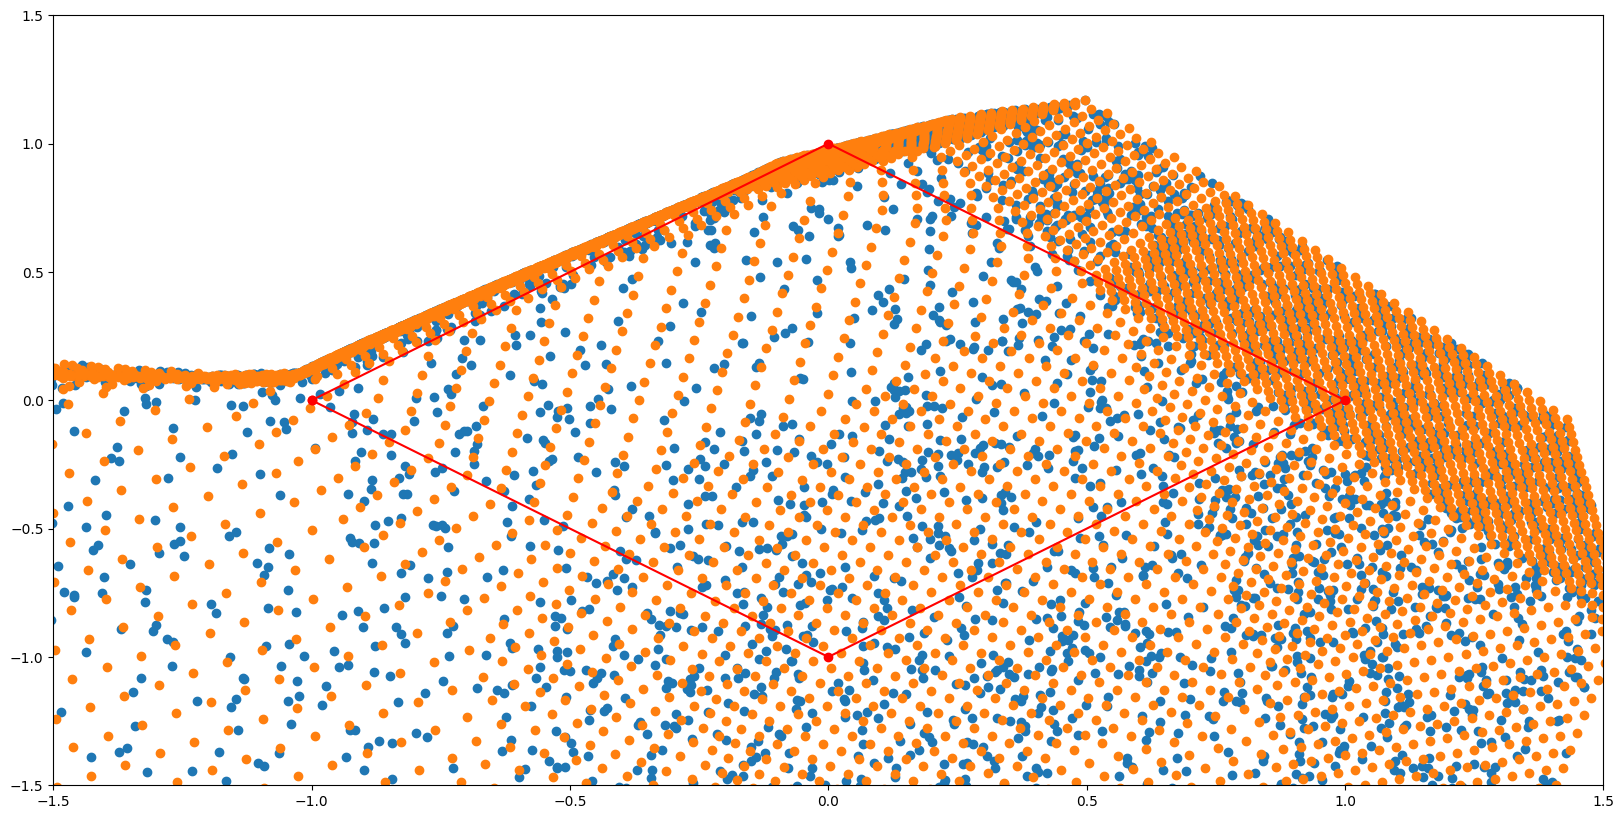

In [5]:
for i in range(int(epochs / 10)):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=10, train_ICNN=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    print("run {}".format(i))
    plots.plt_adversarial_dotted()